In [1]:
import numpy as np
import pandas as pd


#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Building the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import RFECV, f_classif, VarianceThreshold, SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier


#deep learning keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

# Data Loading

In [2]:
df = pd.read_csv('bankruptcy.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Data Exploration

In [3]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [4]:
print("Shape of the dataframe", df.shape)
print("Total potential duplicated rows", df.duplicated().sum())
print("Total null values", df.isnull().sum().sum())

Shape of the dataframe (6819, 96)
Total potential duplicated rows 0
Total null values 0


In [5]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [6]:
round(df['Bankrupt?'].value_counts(normalize=True), 2)
#data is highly imbalanced, which is expe

0    0.97
1    0.03
Name: Bankrupt?, dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [8]:
# Potential multicollinearity due to financial ratio being correlated by nature
# Potentially some columns that have constant values eg. Net Income Flag

In [9]:

var_thres = VarianceThreshold(threshold=0).fit(df)

In [10]:
constant_col = [col for col in df.columns if col not in df.columns[var_thres.get_support()]]
constant_col #Only one column is constant and thus shall be dropped to reduce dimensionality

[' Net Income Flag']

In [11]:
df.drop(constant_col, axis=1, inplace=True)

# Data Preprocessing

In [12]:
df.iloc[::]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [15]:
df.iloc[:,1:]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [25]:
def scale_df(DataFrame):
    scaler = StandardScaler()
    DataFrame.iloc[:,1:] = scaler.fit_transform(DataFrame.iloc[:,1:]) #Scale all columns execpt target "Bankrupt?"
    return(DataFrame)
df_sc = scale_df(df)

# Data Split

In [30]:
# Splitting a dataframe for dependent and independent variables
X = df_sc.drop(columns=['Bankrupt?'])
y = df_sc['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train = pd.concat([y_train, X_train], axis=1)

In [32]:
df_train.shape

(4773, 95)

# Data Preprocessing

In [35]:
# Checking for correlated columns

df_train.corr()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.256657,-0.287579,-0.270446,-0.107246,-0.106765,0.001627,-0.005049,-0.004022,-0.014317,...,0.137446,-0.321233,0.023737,-0.013741,-0.107246,-0.179135,0.193010,-0.000712,-0.006246,-0.096663
ROA(C) before interest and depreciation before interest,-0.256657,1.000000,0.936694,0.986436,0.346584,0.344033,0.037544,0.054064,0.050413,0.017389,...,-0.122121,0.879628,-0.066945,0.014912,0.346586,0.247853,-0.141769,-0.012845,0.016608,0.059342
ROA(A) before interest and % after tax,-0.287579,0.936694,1.000000,0.952868,0.335710,0.333194,0.033066,0.053131,0.049707,0.026560,...,-0.190456,0.958549,-0.100844,0.016146,0.335713,0.265269,-0.142761,-0.009703,0.014297,0.070234
ROA(B) before interest and depreciation after tax,-0.270446,0.986436,0.952868,1.000000,0.345380,0.342767,0.037010,0.054337,0.051064,0.019267,...,-0.137057,0.904620,-0.087246,0.012808,0.345383,0.251359,-0.140262,-0.011294,0.015868,0.063560
Operating Gross Margin,-0.107246,0.346584,0.335710,0.345380,1.000000,0.999491,0.006577,0.012115,0.008746,0.008436,...,-0.029970,0.306348,0.029652,0.005495,1.000000,0.074947,-0.094784,-0.013296,-0.008487,0.121425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,-0.179135,0.247853,0.265269,0.251359,0.074947,0.074485,0.006021,0.010300,0.009660,0.006111,...,0.174375,0.305937,-0.024415,0.004825,0.074945,1.000000,-0.807527,0.000205,0.005732,0.030934
Liability to Equity,0.193010,-0.141769,-0.142761,-0.140262,-0.094784,-0.094751,0.002405,-0.002965,-0.003044,-0.011993,...,-0.120797,-0.166661,0.006336,-0.012610,-0.094783,-0.807527,1.000000,-0.000054,0.004327,-0.165588
Degree of Financial Leverage (DFL),-0.000712,-0.012845,-0.009703,-0.011294,-0.013296,-0.013290,0.000949,0.000930,0.000965,-0.000450,...,-0.001390,-0.008327,-0.002081,-0.014651,-0.013298,0.000205,-0.000054,1.000000,0.016022,-0.012818
Interest Coverage Ratio (Interest expense to EBIT),-0.006246,0.016608,0.014297,0.015868,-0.008487,-0.008436,0.000518,0.001011,0.000897,0.000780,...,-0.000921,0.013563,-0.000560,0.003203,-0.008490,0.005732,0.004327,0.016022,1.000000,-0.014906


In [36]:
# As expected, a lot of columns are correlated as financial data and ratios tend to be correlated (eg. before tax vs after tax values)

In [52]:
df_train_corr = df_train.corr()
df_train_corr = df_train_corr.reindex(df_train_corr["Bankrupt?"].abs().sort_values(ascending=True).index.T)

In [53]:
cols = np.array(df_train_corr.columns)

In [63]:
# Isolating highly correlated independent variables

def correlation(dataset, threshold):
    col_corr = set() # Gives a set of of correlated columns
    corr_matrix = dataset.corr() #Returns a correlation matrix of a given dataset
    for i in range(len(corr_matrix.columns)): 
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlated_ind_variables = correlation(X_train, 0.65)
print("There are", len(correlated_ind_variables), "correlated features")

There are 35 correlated features


In [61]:
# What are the correlated features? 
correlated_ind_variables

{' After-tax Net Profit Growth Rate',
 ' After-tax net Interest Rate',
 ' CFO to Assets',
 ' Cash Flow to Liability',
 ' Cash Flow to Sales',
 ' Cash Reinvestment %',
 ' Continuous interest rate (after tax)',
 ' Current Assets/Total Assets',
 ' Current Liabilities/Equity',
 ' Current Liability to Assets',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Equity to Long-term Liability',
 ' Gross Profit to Sales',
 ' Liability to Equity',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net Worth Turnover Rate (times)',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Operating Funds to Liability',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' Pre-tax net Interest Rate',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest 

In [64]:
# Remove correlated features - SHOULD I KEEP ONE? 
X_train.drop(correlated_ind_variables, axis=1, inplace=True)
X_test.drop(correlated_ind_variables, axis=1, inplace=True)
df_train.drop(correlated_ind_variables,axis=1, inplace=True)
df_train.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
4106,0,0.651736,0.411719,0.028402,-0.009811,-0.616334,-0.750713,0.587161,-0.151921,0.428464,...,-0.012111,1.451370,0.615384,-0.461267,-0.034272,-0.049491,0.003956,-0.047864,-0.015069,0.268111
2799,0,1.786097,-0.130943,0.020524,0.010954,-0.616334,-0.529012,0.215597,-0.151921,0.371521,...,-0.012111,-0.065158,-0.031906,0.053304,-0.034272,-0.049491,-0.007333,-0.047511,-0.013083,-0.359716
1596,0,-0.240811,0.882026,0.026972,0.009850,-0.616334,2.282272,1.888570,-0.151921,-0.829388,...,-0.012111,-2.591799,-0.931246,-0.931539,-0.034272,-0.049491,0.043382,-0.047821,-0.014828,8.465752
2278,0,-1.126930,-0.948979,0.011375,-0.012149,-0.498339,-0.750713,-0.723406,-0.151921,-0.829388,...,-0.012111,-0.708459,-0.928403,0.325109,-0.034272,-0.049491,-0.052014,-0.056615,-0.071912,-0.662117
1493,0,0.536854,1.129309,0.043377,-0.003272,-0.616334,-0.730121,1.015351,-0.151921,0.601482,...,-0.012111,0.102705,0.010528,-0.889009,-0.034272,-0.049491,0.091760,-0.047870,-0.015101,3.460522


# Feature Selection

## Recursive Feature Elimination with Cross Validation - Logistic Regression

In [72]:
#Feature selection for linear regression
#Use rfecv to determine which features should remain in our model
lgr = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=lgr, step=5, cv=5, scoring='f1', importance_getter='coef_')
rfecv = rfecv.fit(X_train, y_train)

select_features_rfecv = pd.DataFrame({'Features': list(X_train.columns),
                                  'Ranking_cv': rfecv.ranking_})
select_features_rfecv = select_features_rfecv.sort_values(by='Ranking_cv')

#Let's also get their score on correlation
select_features = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train)
select_features_kbest = pd.DataFrame({'Features': list(X_train.columns),
                                  'Scores': select_features.scores_})
select_features_kbest.sort_values(by='Scores', ascending = False)

#Let's display the result
select_features_rfecv.merge(select_features_kbest, how='left', on='Features').head(20)

,Features,Ranking_cv,Scores
0,ROA(C) before interest and depreciation befor...,1,336.441815
1,Total income/Total expense,1,0.234927
2,Cash/Total Assets,1,50.185958
3,Accounts Receivable Turnover,1,0.303904
4,Total Asset Turnover,1,34.046873
5,Debt ratio %,1,322.286662
6,Net Value Per Share (B),1,125.712478
7,Equity to Liability,1,44.999485
8,Operating Profit Rate,1,0.012624
9,Average Collection Days,2,0.224835


In [74]:
# Select the 9 most important features. We are very likely to remove the 3 features with scores lower than 1, but I am interested
# in peeking at their basic information.
features = ["Bankrupt?"]
for i in range (9):
    features.append(select_features_rfecv.iloc[i,0])
final_df = df.loc[:, df.columns.isin(features)]
round(final_df.describe(),2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Profit Rate,Net Value Per Share (B),Debt ratio %,Total Asset Turnover,Accounts Receivable Turnover,Cash/Total Assets,Total income/Total expense,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,0.18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,-8.33,-76.77,-5.71,-2.10,-1.40,-0.05,-0.89,-0.21,-0.95
25%,0.00,-0.47,0.02,-0.51,-0.75,-0.64,-0.05,-0.65,-0.03,-0.46
50%,0.00,-0.04,0.02,-0.19,-0.03,-0.23,-0.05,-0.35,-0.02,-0.28
75%,0.00,0.50,0.03,0.27,0.66,0.35,-0.05,0.27,-0.00,0.11
max,1.00,8.15,0.10,24.24,16.45,8.49,34.96,6.29,82.49,19.04


In [79]:
pip install matplotlib-inline

  Using cached matplotlib_inline-0.1.3-py3-none-any.whl (8.2 kB)
Note: you may need to restart the kernel to use updated packages.


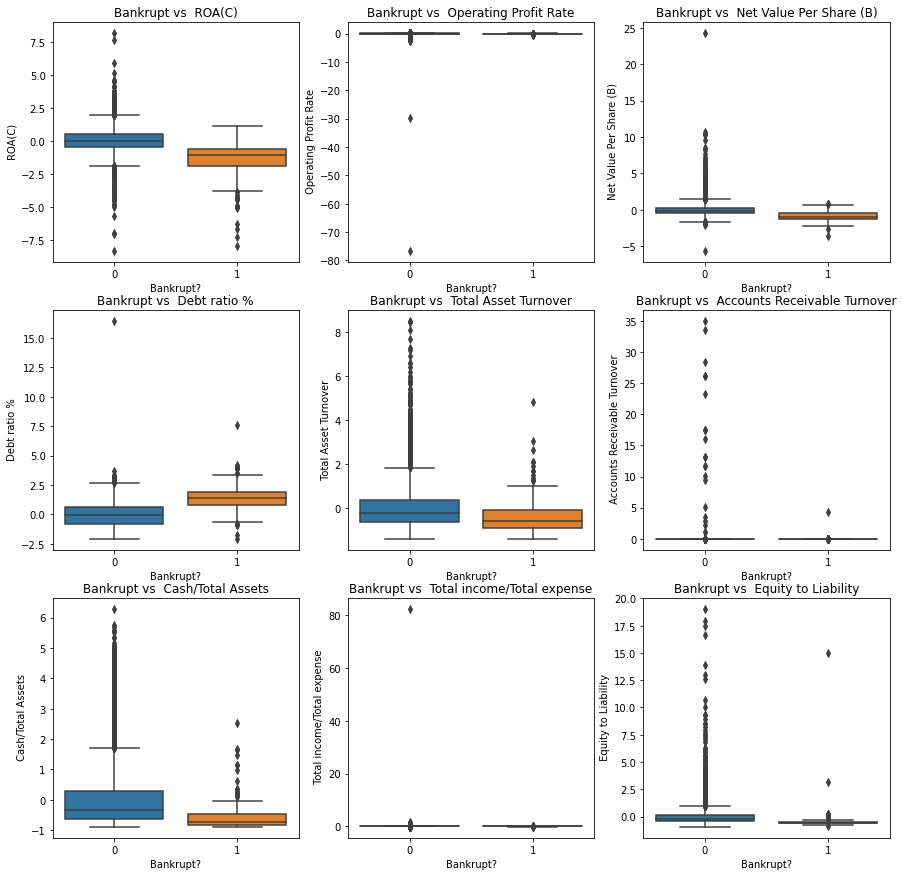

In [80]:
# Changing name of one column

#change name for clarity purpose:
final_df = final_df.rename(columns={' ROA(C) before interest and depreciation before interest': ' ROA(C)'})

#plotting boxplot to look for outliers:
fig, saxis = plt.subplots(3, 3,figsize=(15,15))
for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=final_df.columns[i+1], data=final_df, ax=saxis[0,i])
    saxis[0,i].set_title(f"Bankrupt vs {final_df.columns[i+1]}")

for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=final_df.columns[i+4], data=final_df, ax=saxis[1,i])
    saxis[1,i].set_title(f"Bankrupt vs {final_df.columns[i+4]}")
    
for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=final_df.columns[i+7], data=final_df, ax=saxis[2,i])
    saxis[2,i].set_title(f"Bankrupt vs {final_df.columns[i+7]}")

In [81]:
# Write some observations here

#Bankrupt 

In [82]:
#In the end, the 3 features with low k scores only seem to have impact mostly for outliers.
final_df.drop(' Accounts Receivable Turnover', axis=1, inplace=True)
final_df.drop(' Total income/Total expense', axis=1, inplace=True)
final_df.drop(' Operating Profit Rate', axis=1, inplace=True)
final_df.shape

(6819, 7)

## Logistic Regression

c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without featu

f1_score: 0.434


c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


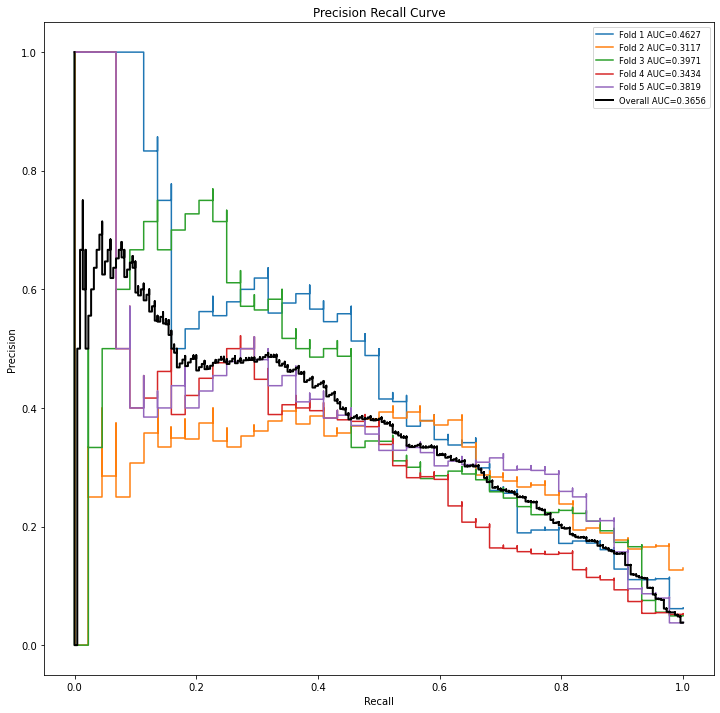

In [84]:
#Split the df:
X = final_df.drop(columns=["Bankrupt?"])
y = final_df["Bankrupt?"]

#metrics
accuracy_score = []
f1_score = []

#kfold
kfold = StratifiedKFold(n_splits=5,shuffle=True)

y_real = []
y_proba = []
plt.figure(figsize=(12,12))
#Let's use a Logistic function to check the results:
for i, (train_fold_index, test_fold_index) in enumerate(kfold.split(X, y)):
    #split the data
    X_train_fold, X_test_fold = X.iloc[train_fold_index], X.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]
    X_train_fold = StandardScaler().fit_transform(X_train_fold)
    #upsample the data - deleted in favor of class weights:
    #X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold, y_train_fold)
    
    #fit the model
    model2 = LogisticRegression(solver='lbfgs',max_iter=1000, class_weight = {0:1 , 1:6}).fit(X_train_fold, y_train_fold)
    y_pred_fold = model2.predict(X_test_fold)
    decision = model2.decision_function(X_test_fold)
    
    #Score the model:
    score1 = round(np.mean(cross_val_score(model2, X_test_fold, y_test_fold, scoring='accuracy', cv=kfold, n_jobs=1)),2)
    score2 = round(np.mean(cross_val_score(model2, X_test_fold, y_test_fold, scoring='f1', cv=kfold, n_jobs=1)),2)
    accuracy_score.append(score1)
    f1_score.append(score2)
    
    #plot PR-curve
    precision, recall, thresholds = precision_recall_curve(y_test_fold, decision)
    area = auc(recall, precision)
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    plt.step(recall, precision, label=lab)
    y_real.append(y_test_fold)
    y_proba.append(decision)

#plotting the average PR curve
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
plt.step(recall, precision, label=lab, lw=2, color='black')

plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right', fontsize='small')
print('f1_score:', np.mean(f1_score))

# Decision Tree Classifier

In [86]:
features = ["Bankrupt?"]
for i in range (19):
    features.append(select_features_rfecv.iloc[i,0])
final_df = df.loc[:, df.columns.isin(features)]
#Split the df:
X = final_df.drop(columns=["Bankrupt?"])
y = final_df["Bankrupt?"]

#gridsearchcv
param_dict = {'max_leaf_nodes': [3,10,20,30,40], 'min_samples_split': [2, 3, 4,8], 'max_depth': [5,8,11,14,17,20]}
grid = GridSearchCV(DecisionTreeClassifier(class_weight = {0:1 , 1:6}), param_grid=param_dict, cv=5,verbose=1,n_jobs=-1, scoring='f1')
grid.fit(X, y)
model_grid = grid.best_estimator_


kfold = StratifiedKFold(n_splits=5,shuffle=True)
list_tree_score ={"accuracy":[],
                 "f1_score": []}


for train_fold_index, test_fold_index in kfold.split(X, y):
    #split the data
    X_train_fold, X_test_fold = X.iloc[train_fold_index], X.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]
    X_train_fold = StandardScaler().fit_transform(X_train_fold)
    
    #upsample the data:
    #X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold, y_train_fold)
    
    #fit the model
    model = model_grid.fit(X_train_fold, y_train_fold)
    
    #Score the model:
    score1 = round(np.mean(cross_val_score(model, X_test_fold, y_test_fold, scoring='accuracy', cv=kfold, n_jobs=1)),2)
    score2 = round(np.mean(cross_val_score(model, X_test_fold, y_test_fold, scoring='f1', cv=kfold, n_jobs=1)),2)
    list_tree_score["accuracy"].append(score1)
    list_tree_score["f1_score"].append(score2)
 
accuracy = np.mean(list_tree_score["accuracy"])
f1_score = np.mean(list_tree_score["f1_score"])

print(f"the accuracy of the model is {accuracy}")
print(f"the f1_score of the model is {f1_score}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
the accuracy of the model is 0.942
the f1_score of the model is 0.32


# Simple NN using Keras

In [89]:
def classification_model():
    #initiating the model
    model = Sequential()
    model.add(Dense(input_dim=X_train.shape[1], units=6, activation="relu"))
    
    #for loop to add layers (can be fine tuned): 
    for i in range(2):
        model.add(Dense(units=6, activation="relu"))
        #If we add more layers, we would want to avoid overfitting with a Dropout layer model.add(Dropout(.1))
    
    #last layer (2 categories)
    model.add(Dense(units=2, activation='sigmoid'))
    
    #compile the model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

loop 0 classification report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1653
           1       0.31      0.46      0.37        52

    accuracy                           0.95      1705
   macro avg       0.65      0.71      0.67      1705
weighted avg       0.96      0.95      0.96      1705

loop 1 classification report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1644
           1       0.33      0.43      0.37        61

    accuracy                           0.95      1705
   macro avg       0.65      0.70      0.67      1705
weighted avg       0.96      0.95      0.95      1705

loop 2 classification report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1655
           1       0.25      0.62      0.35        50

    accuracy                           0.93      1705
   macro avg       0.62      0.78     

array([[15870.,   622.],
       [  241.,   317.]])

--------------------------------------------------------


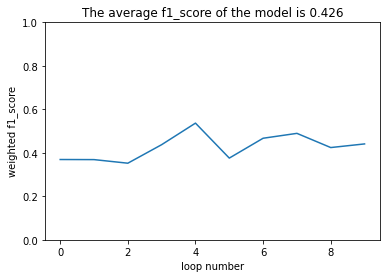

In [90]:
#set class weights to offset the class imbalance:
weights = {0:1 , 1:4}
list_scores_keras =[]
confusion_matrix_average1 = np.zeros((2, 2))

#Let's create a loop to check our average accuracy:

for i in range(10):
    
    #Let's split the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,train_size=0.75, random_state=0+i)
    
    #Now let's one hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    #We will convert all the DataFrame to arrays:
    X_train = StandardScaler().fit_transform(X_train)
    X_test = X_test.values

    
    #Initiate the model:
    model = classification_model()
    #fitting the model:
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=15, verbose=0,class_weight=weights)

    #confusion matrix:
    model_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test.argmax(axis=1), model_pred.argmax(axis=1))
    confusion_matrix_average1 = confusion_matrix_average1 + matrix
    print(f"loop {i} classification report:", classification_report(y_test.argmax(axis=1), model_pred.argmax(axis=1)))
    
    #evaluate the model:
    tn, fp, fn, tp = matrix.ravel()
    f1_score = tp/ (tp+0.5*(fp+fn))
    list_scores_keras.append(f1_score)
    
#Let's plot the result to visualize how robust our model is:
fig = plt.figure()
ax = plt.axes()
ax.plot(list_scores_keras, scaley=False)
ax.set_title(f"The average f1_score of the model is {round(np.mean(list_scores_keras),3)}")
plt.xlabel('loop number')
plt.ylabel("weighted f1_score")

print('--------------------------------------------------------')
display(confusion_matrix_average1)
print('--------------------------------------------------------')
#print("last epoch classification report:", classification_report(y_test.argmax(axis=1), model_pred.argmax(axis=1)))

In [ ]:
# References - used as a guiding path mainly to understand feature importance 
# https://www.kaggle.com/code/aymericpeltier/accurately-predicting-bankruptcy
